# 0.SETUP


In [1]:
# numpy for numerical analysis
import numpy as np

# pandas to process the data in a dataframe
import pandas as pd

# matplotlib for basic visulaisation
from matplotlib import pyplot as plt

# seaborn for more advanced plotting
import seaborn as sns

In [2]:
#path to read
vgsales_path = "../input/sales-video-games-1985-to-2018/vgsales.csv"

In [3]:
#Reading the file 
vgsales = pd.read_csv(vgsales_path)

For Tableau Visualization - 
Click - https://public.tableau.com/app/profile/rishabh6953/viz/ConsoleWarsOverview1994-2018/ConsoleWarsOverview1984-2018

# 1. Description of the sales DATA

**1.1 Overview**


In [4]:
#Before starting making the column names lowercases for better formatting.
# All the SALES are in millions and renamed in lower cases
vgsales = vgsales.rename(columns={'Rank':'rank','Year':'year','Name': 'name','Platform':'platform','Genre':'genre','Publisher':'publisher','NA_Sales':'na_sales','EU_Sales':'eu_sales','JP_Sales':'jp_sales','Other_Sales':'other_sales','Global_Sales': 'total_sales', })
vgsales = vgsales.sort_values('total_sales', ascending = False)
vgsales = vgsales.dropna()
display(vgsales.head(10))

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
# Data field headers and datatype
vgsales.info()

# Find number of rows & columns
vgsales.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16596 entries, 0 to 16595
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         16596 non-null  int64  
 1   name         16596 non-null  object 
 2   platform     16596 non-null  object 
 3   year         16596 non-null  int64  
 4   genre        16596 non-null  object 
 5   publisher    16596 non-null  object 
 6   na_sales     16596 non-null  float64
 7   eu_sales     16596 non-null  float64
 8   jp_sales     16596 non-null  float64
 9   other_sales  16596 non-null  float64
 10  total_sales  16596 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


(16596, 11)

Here we can see the fields included within this dataset. A short explanation of them below:

* **name** - The title of the Video Game
* **platform** - The platform the game was released on (e.g. PC, Wii etc.)
* **year** - The year the game was released
* **genre** - The genre of the game (as classified by vgchartz)
* **publisher** - The company which published the game
* **na_sales** - Sales in North America (in millions)
* **eu_sales** - Sales in Europe (in millions)
* **jp_sales** - Sales in Japan (in millions)
* **other_sales** - Sales in the rest of the world (in millions)
* **total_sales** - Total sales across the world (in millions)

In [6]:
#description
display(vgsales.describe())

,rank,year,na_sales,eu_sales,jp_sales,other_sales,total_sales
count,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000,16596.000000
mean,8300.397566,2006.384068,0.264683,0.146670,0.077789,0.048068,0.537486
std,4791.897534,5.867575,0.816730,0.505379,0.309309,0.188599,1.555116
min,1.000000,1977.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4150.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**1.2 NULL VALUES**

Are Null values present in the data set?


In [7]:
vgsales.isnull().sum()

rank           0
name           0
platform       0
year           0
genre          0
publisher      0
na_sales       0
eu_sales       0
jp_sales       0
other_sales    0
total_sales    0
dtype: int64

Before loading the dataset, it was cleaned thoroughly, removing the NULL values and filling them with appropriate data such as year, publisher, platform etc. A tidy dataset ensures us to have the best analysis possible.



# 2. ANALYSIS

In [8]:
#OVERVIEW OF THE REGIONAL SALES DATA
vgsales[['na_sales', 'eu_sales', 'jp_sales','other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16596.000000,16596.000000,16596.000000,16596.000000
mean,0.264683,0.146670,0.077789,0.048068
std,0.816730,0.505379,0.309309,0.188599
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.040000
max,41.490000,29.020000,10.220000,10.570000


We can see how the mean sales in North America is higher than all other regions by a reasonable margin.

# **2.1 Making a sales bucket for all the observations.**

It will help us categories the sales and get a better idea of the range os the sales.


In [9]:
vgsales.loc[vgsales['total_sales'] == 0.00, 'total_sales_bucket'] = '0 Sales'
vgsales.loc[(vgsales['total_sales'] >= 0.00) & (vgsales['total_sales'] < 5.00), 'total_sales_bucket'] = '0 - 5 Million' 
vgsales.loc[(vgsales['total_sales'] >= 5.00) & (vgsales['total_sales'] < 10.00), 'total_sales_bucket'] = '5 - 10 Million'
vgsales.loc[(vgsales['total_sales'] >= 10.00) & (vgsales['total_sales'] < 50.00), 'total_sales_bucket'] = '10 - 50 Million'
vgsales.loc[(vgsales['total_sales'] >= 50.00) & (vgsales['total_sales'] < 100.00), 'total_sales_bucket'] = '50 - 100 Million'
vgsales.loc[vgsales['total_sales'] >= 100.00, 'total_sales_bucket'] = ' 100+ Million' 
vgsales

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales,total_sales_bucket
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50 - 100 Million
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,10 - 50 Million
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,10 - 50 Million
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10 - 50 Million
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,10 - 50 Million
...,...,...,...,...,...,...,...,...,...,...,...,...
16174,16179,San-X Character Channel: All-Star Daishuugou!,DS,2008,Action,MTO,0.00,0.00,0.01,0.00,0.01,0 - 5 Million
16175,16180,Rail Simulator,PC,2007,Simulation,Electronic Arts,0.00,0.01,0.00,0.00,0.01,0 - 5 Million
16178,16183,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0.00,0.00,0.01,0.00,0.01,0 - 5 Million
16180,16185,Princess Arthur,PSP,2013,Misc,Idea Factory,0.00,0.00,0.01,0.00,0.01,0 - 5 Million


Making the same buckets for every other region.

In [10]:
#Making sales Bucket for all the Regions

#For North American Sales
vgsales.loc[vgsales['na_sales'] == 0.00, 'na_sales_bucket'] = '0 Sales'
vgsales.loc[(vgsales['na_sales'] >= 0.00) & (vgsales['na_sales'] < 5.00), 'na_sales_bucket'] = '0 - 5 Million' 
vgsales.loc[(vgsales['na_sales'] >= 5.00) & (vgsales['na_sales'] < 10.00), 'na_sales_bucket'] = '5 - 10 Million'
vgsales.loc[(vgsales['na_sales'] >= 10.00) & (vgsales['na_sales'] < 50.00), 'na_sales_bucket'] = '10 - 50 Million'
vgsales.loc[(vgsales['na_sales'] >= 50.00) & (vgsales['na_sales'] < 100.00), 'na_sales_bucket'] = '50 - 100 Million'
vgsales.loc[vgsales['na_sales'] >= 100.00, 'na_sales_bucket'] = ' 100+ Million' 

#For European Sales
vgsales.loc[vgsales['eu_sales'] == 0.00, 'eu_sales_bucket'] = '0 Sales'
vgsales.loc[(vgsales['eu_sales'] >= 0.00) & (vgsales['eu_sales'] < 5.00), 'eu_sales_bucket'] = '0 - 5 Million' 
vgsales.loc[(vgsales['eu_sales'] >= 5.00) & (vgsales['eu_sales'] < 10.00), 'eu_sales_bucket'] = '5 - 10 Million'
vgsales.loc[(vgsales['eu_sales'] >= 10.00) & (vgsales['eu_sales'] < 50.00), 'eu_sales_bucket'] = '10 - 50 Million'
vgsales.loc[(vgsales['eu_sales'] >= 50.00) & (vgsales['eu_sales'] < 100.00), 'eu_sales_bucket'] = '50 - 100 Million'
vgsales.loc[vgsales['eu_sales'] >= 100.00, 'eu_sales_bucket'] = ' 100+ Million' 


#For Japanese Sales 
vgsales.loc[vgsales['jp_sales'] == 0.00, 'jp_sales_bucket'] = '0 Sales'
vgsales.loc[(vgsales['jp_sales'] >= 0.00) & (vgsales['jp_sales'] < 5.00), 'jp_sales_bucket'] = '0 - 5 Million' 
vgsales.loc[(vgsales['jp_sales'] >= 5.00) & (vgsales['jp_sales'] < 10.00), 'jp_sales_bucket'] = '5 - 10 Million'
vgsales.loc[(vgsales['jp_sales'] >= 10.00) & (vgsales['jp_sales'] < 50.00), 'jp_sales_bucket'] = '10 - 50 Million'
vgsales.loc[(vgsales['jp_sales'] >= 50.00) & (vgsales['jp_sales'] < 100.00), 'jp_sales_bucket'] = '50 - 100 Million'
vgsales.loc[vgsales['jp_sales'] >= 100.00, 'jp_sales_bucket'] = ' 100+ Million' 

#For Other Sales
vgsales.loc[vgsales['other_sales'] == 0.00, 'other_sales_bucket'] = '0 Sales'
vgsales.loc[(vgsales['other_sales'] >= 0.00) & (vgsales['other_sales'] < 5.00), 'other_sales_bucket'] = '0 - 5 Million' 
vgsales.loc[(vgsales['other_sales'] >= 5.00) & (vgsales['other_sales'] < 10.00), 'other_sales_bucket'] = '5 - 10 Million'
vgsales.loc[(vgsales['other_sales'] >= 10.00) & (vgsales['other_sales'] < 50.00), 'other_sales_bucket'] = '10 - 50 Million'
vgsales.loc[(vgsales['other_sales'] >= 50.00) & (vgsales['other_sales'] < 100.00), 'other_sales_bucket'] = '50 - 100 Million'
vgsales.loc[vgsales['other_sales'] >= 100.00, 'other_sales_bucket'] = ' 100+ Million' 
vgsales



,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales,total_sales_bucket,na_sales_bucket,eu_sales_bucket,jp_sales_bucket,other_sales_bucket
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50 - 100 Million,10 - 50 Million,10 - 50 Million,0 - 5 Million,5 - 10 Million
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,10 - 50 Million,10 - 50 Million,0 - 5 Million,5 - 10 Million,0 - 5 Million
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,10 - 50 Million,10 - 50 Million,10 - 50 Million,0 - 5 Million,0 - 5 Million
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10 - 50 Million,10 - 50 Million,10 - 50 Million,0 - 5 Million,0 - 5 Million
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,10 - 50 Million,10 - 50 Million,5 - 10 Million,10 - 50 Million,0 - 5 Million
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16174,16179,San-X Character Channel: All-Star Daishuugou!,DS,2008,Action,MTO,0.00,0.00,0.01,0.00,0.01,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million
16175,16180,Rail Simulator,PC,2007,Simulation,Electronic Arts,0.00,0.01,0.00,0.00,0.01,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million
16178,16183,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0.00,0.00,0.01,0.00,0.01,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million
16180,16185,Princess Arthur,PSP,2013,Misc,Idea Factory,0.00,0.00,0.01,0.00,0.01,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million,0 - 5 Million


Counting the number of observations which lies in the above mentioned bucket 


In [11]:
#Making a table for total number of sales bucket per range entries
vgbucket = vgsales.groupby('total_sales_bucket').agg({'total_sales_bucket': 'count'})
vgbucket= vgbucket.rename(columns={'total_sales_bucket' : 'total_entries'})
vgbucket.sort_values("total_entries").reset_index()

,total_sales_bucket,total_entries
0,50 - 100 Million,1
1,10 - 50 Million,61
2,5 - 10 Million,145
3,0 - 5 Million,16389


We can see that majority of the sales lies between 0-5 million sales bucket with only 1 surpassing the 50 milllion mark. But can the same be said for all the regions?

In [12]:
#Making a table for total number of NA sales bucket per range entries
vgbucketna = vgsales.groupby('na_sales_bucket').agg({'na_sales_bucket': 'count'})
vgbucketna= vgbucketna.rename(columns={'na_sales_bucket' : 'total_entries_na'})
bucket_na = vgbucketna.sort_values("total_entries_na").reset_index()

#Making a table for total number of EU sales bucket per range entries
vgbucketeu = vgsales.groupby('eu_sales_bucket').agg({'eu_sales_bucket': 'count'})
vgbucketeu= vgbucketeu.rename(columns={'eu_sales_bucket' : 'total_entries_eu'})
bucketeu= vgbucketeu.sort_values("total_entries_eu").reset_index()

#Making a table for total number of JP sales bucket per range entries
vgbucketjp = vgsales.groupby('jp_sales_bucket').agg({'jp_sales_bucket': 'count'})
vgbucketjp= vgbucketjp.rename(columns={'jp_sales_bucket' : 'total_entries_jp'})
bucketjp = vgbucketjp.sort_values("total_entries_jp").reset_index()

#Making a table for total number of JP sales bucket per range entries
vgbucketot = vgsales.groupby('other_sales_bucket').agg({'other_sales_bucket': 'count'})
vgbucketot= vgbucketot.rename(columns={'other_sales_bucket' : 'total_entries_other'})
bucket_other = vgbucketot.sort_values("total_entries_other").reset_index()

#Combining all the above Dataframs and removing unneccesary columns.
sales_bucket = pd.concat([bucket_na,bucketeu,bucketjp,bucket_other], axis=1)
sales_bucket.drop(['eu_sales_bucket',"jp_sales_bucket","other_sales_bucket"], axis=1).rename(columns={"na_sales_bucket":"sales_range"})

,sales_range,total_entries_na,total_entries_eu,total_entries_jp,total_entries_other
0,10 - 50 Million,13,4,1,1
1,5 - 10 Million,45,23,8,2
2,0 - 5 Million,16538,16569,16587,16593


As we can see most of the sales lies between 0 - 5 million mark even regionwise. Apparently,there is no video game that made more then 50 million sales in a single region

# **2.2 PLATFORM**

Before starting we should know which platforms are present in dataset.

In [13]:
vgsales.platform.value_counts().index.sort_values()

Index(['2600', '3DO', '3NDS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N3DS', 'N64', 'NDS', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3',
       'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU',
       'X360', 'XB', 'XOne'],
      dtype='object')

Their full names are listed here here, grouped by company then by year of release:


| Company | Abbreviation | Full name | Year of Release |
| --- | --- | --- | --- |
| The 3DO Company | 3DO | 3DO Interactive Multiplayer | 1993 |
| Atari | 2600 | Atari 2600 | 1977 |
| Bandai | WS | WonderSwan | 1999 |
| NEC & Hudson Soft | TG16 | TurboGrafx-16 | 1987 |
| NEC & Hudson Soft | PC-FX | PC-FX | 1994 |
| Microsoft | XB | Xbox | 2001 |
| Microsoft | X360 | Xbox 360 | 2005 |
| Microsoft | XOne | Xbox One | 2013 |
| Nintendo | NES | Nintendo Entertainment System | 1983 |
| Nintendo | GB | Game Boy | 1989 |
| Nintendo | SNES | Super Nintendo Entertainment System | 1990 |
| Nintendo | N64 | Nintendo 64 | 1996 |
| Nintendo | GBA | Game Boy Advance | 2001 |
| Nintendo | GC | Gamecube | 2001 |
| Nintendo | DS | Nintendo DS | 2004 |
| Nintendo | Wii | Wii | 2006 |
| Nintendo | 3DS | Nintendo 3DS | 2011 |
| Nintendo | WiiU | Wii U | 2012 |
| Sega | GEN | Sega Genesis | 1988 |
| Sega | DC | Dreamcast | 1998 |
| Sega | GG | Game Gear | 1990 |
| Sega | SCD | Sega CD | 1991 |
| Sega | SAT | Sega Saturn | 1994 |
| Sony | PS | PlayStation | 1994 |
| Sony | PS2 | PlayStation 2 | 2000 |
| Sony | PSP | PlayStation Portable | 2004 |
| Sony | PS3 | PlayStation 3 | 2006 |
| Sony | PSV | PlayStation Vita | 2011 |
| Sony | PS4 | PlayStation 4 | 2013 |
| SNK Corporation | NG | Neo Geo | 1990 |
| - | PC | Personal Computer | 1985* |

\*Year of Release for PC is taken as the oldest PC game in the database


**2.2.1 How many games has been released for each platform?**

In [14]:
#Making a table for PLATFORM distributon.
#making a  table for number of games for platforms using groupby
vgsales_platform = vgsales.groupby('platform').agg({'total_sales':'sum', 'name': 'count'})
#Renaming the columns in lowercases
vgsales_plat= vgsales_platform.rename(columns={'total_sales': 'total_sales_in_millions', 'name' : 'num_of_games'}) 
# Resetting Index
vgsales_plat1 = vgsales_plat.reset_index()

#Calculated Percent Number of Games
vgsales_plat1["percent_num_of_games"] = vgsales_plat1["num_of_games"]/vgsales_plat1['num_of_games'].sum()*100

#Sorted according to Percentage 
vgsales_plat2 = vgsales_plat1.sort_values("percent_num_of_games", ascending = False)

#Calculated Cummulative Percentage
vgsales_plat2["cumm_perc_num_of_games"] = vgsales_plat2["percent_num_of_games"].cumsum()
vgsales_plat2.reset_index(drop = True)

,platform,total_sales_in_millions,num_of_games,percent_num_of_games,cumm_perc_num_of_games
0,PS2,1255.64,2161,13.021210,13.021210
1,DS,818.67,2132,12.846469,25.867679
2,PS3,957.84,1329,8.007954,33.875633
3,Wii,926.71,1325,7.983852,41.859484
4,X360,979.96,1265,7.622319,49.481803
5,PSP,296.28,1213,7.308990,56.790793
6,PS,730.66,1196,7.206556,63.997349
7,PC,258.82,960,5.784526,69.781875
8,XB,258.26,824,4.965052,74.746927
9,GBA,318.50,822,4.953001,79.699928


[Text(0, 0.5, 'Number of Games')]

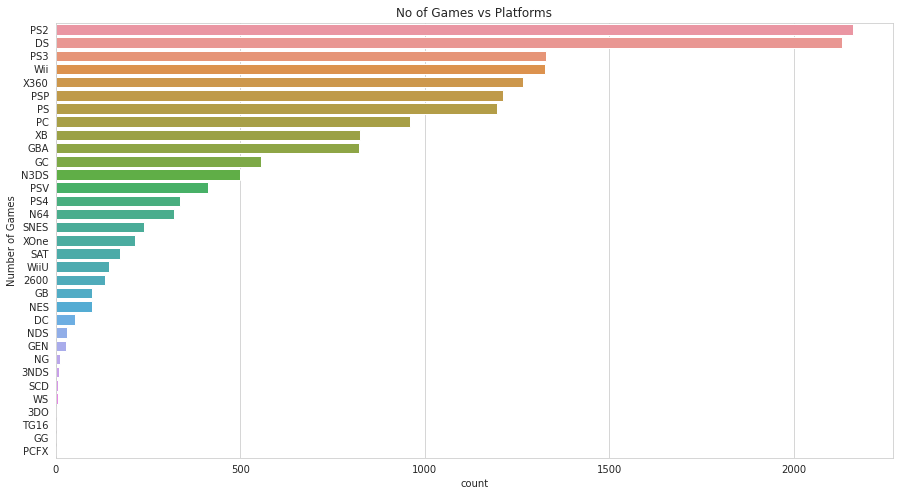

In [15]:
#Plotting for the Number of games 
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
a = sns.countplot(y = "platform", data=vgsales, order=vgsales.platform.value_counts().index)
a.set_title("No of Games vs Platforms")
a.set(ylabel= "Number of Games")

We can see that at a Global level PS2 and Nintendo DS has the most number of video games sold.

[Text(0.5, 0, 'Total sales in millions')]

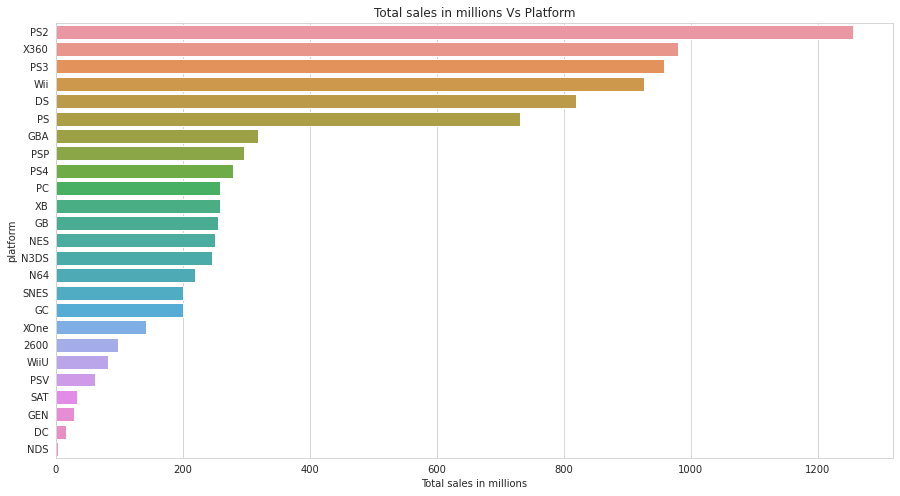

In [16]:
#Making a visualization for Total sales vs Platform for the first 25 observations
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
a =sns.barplot(y="platform", x="total_sales_in_millions", data=vgsales_plat2.sort_values("total_sales_in_millions",ascending=False).head(25))
a.set_title("Total sales in millions Vs Platform")
a.set(xlabel= "Total sales in millions")


We can clearly see more number of games for Playstation 2 made the most sales, however the same can not be said for Nintendo DS which, despite making 2132 units they were not able to sell that much. Other then that Consoles such as XBOX360, Playstation 3 and Nintendo WII made considerable sales.

But is that the same case with Regional data?

In [17]:
# Making a Table for NORTH AMERICAN sales.
#NA SALES DISTRIBUTION for Platfrom
nas_platform = vgsales.groupby('platform').agg({'na_sales':'sum', 'name': 'count'})

#Rename in lowercases
nas_platform= nas_platform.rename(columns={'na_sales': 'na_sales_in_millions', 'name' : 'num_of_games'})
nas_platform = nas_platform.sort_values("na_sales_in_millions", ascending=False)

#Add Percentage statistic and Cummulative Percentage
nas_platform["percent_num_of_games"] = nas_platform["num_of_games"]/nas_platform['num_of_games'].sum()*100
nas_platform["cumm_num_of_games"] = nas_platform["percent_num_of_games"].cumsum()

#Platform with more then 1 millions sales
nas_plat=nas_platform.reset_index().head(24)
nas_plat

,platform,na_sales_in_millions,num_of_games,percent_num_of_games,cumm_num_of_games
0,X360,601.05,1265,7.622319,7.622319
1,PS2,583.84,2161,13.021210,20.643529
2,Wii,507.71,1325,7.983852,28.627380
3,PS3,392.26,1329,8.007954,36.635334
4,DS,388.29,2132,12.846469,49.481803
5,PS,336.51,1196,7.206556,56.688359
6,GBA,187.54,822,4.953001,61.641359
7,XB,186.69,824,4.965052,66.606411
8,N64,139.02,319,1.922150,68.528561
9,GC,133.46,556,3.350205,71.878766


[Text(0.5, 0, 'NA sales in millions')]

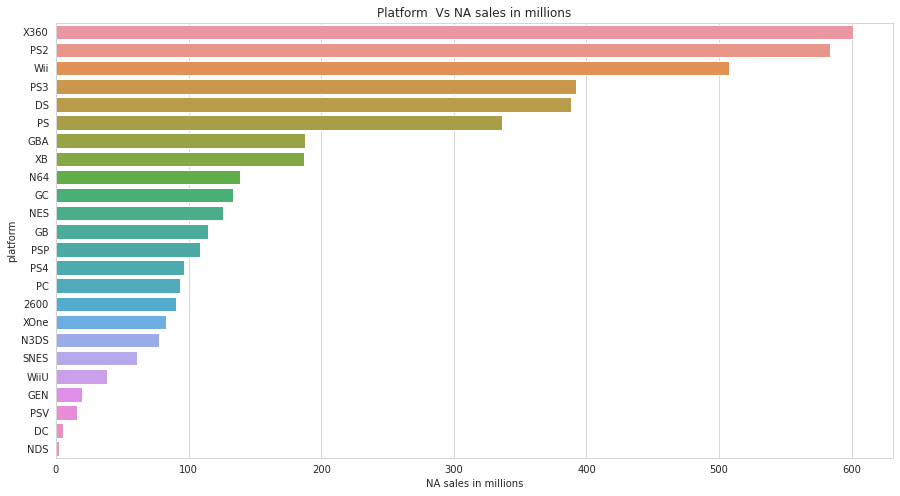

In [18]:
#visualize NA SALES VS PLATFORM
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
b =sns.barplot(y="platform", x="na_sales_in_millions" ,data=nas_plat)
b.set_title("Platform  Vs NA sales in millions" )
b.set(xlabel= "NA sales in millions")

[Text(0.5, 0, ' NA Number of games')]

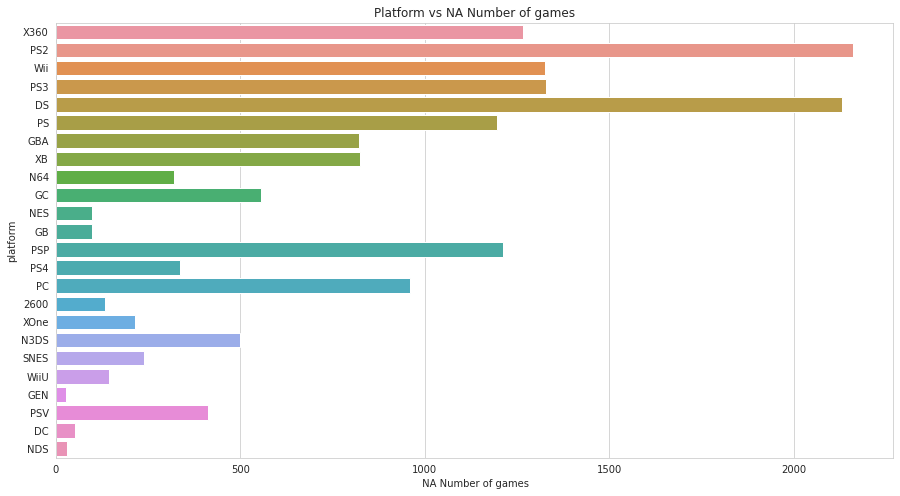

In [19]:
# For PLATFORM vs  number of games NA region
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
c =sns.barplot(y="platform", x="num_of_games" ,data=nas_plat)
c.set_title("Platform vs NA Number of games")
c.set(xlabel= " NA Number of games")

In North America, Xbox 360 despite having less number of units then PS2, made more sales.
XBOX360, PS2, Ninetendo Wii remains the top 3 best selling platforms.

Repeating the same for other regions.

In [20]:
#EU 
#EU SALES DISTRIBUTION for Platfrom
eus_platform = vgsales.groupby('platform').agg({'eu_sales':'sum', 'name': 'count'}).sort_values("eu_sales", ascending=False)

#Rename in lowercases
eus_platform= eus_platform.rename(columns={'eu_sales': 'eu_sales_in_millions', 'name' : 'num_of_games'}) 

#Add Percentage statistic and Cummulative Percentage
eus_platform["percent_num_of_games"] = eus_platform["num_of_games"]/eus_platform['num_of_games'].sum()*100
eus_platform["cumm_num_of_games"] = eus_platform["percent_num_of_games"].cumsum()

eus_plat = eus_platform.reset_index() # Index reset
eus_plat

,platform,eu_sales_in_millions,num_of_games,percent_num_of_games,cumm_num_of_games
0,PS3,343.71,1329,8.007954,8.007954
1,PS2,339.29,2161,13.021210,21.029164
2,X360,280.58,1265,7.622319,28.651482
3,Wii,268.38,1325,7.983852,36.635334
4,PS,213.60,1196,7.206556,43.841890
5,DS,194.07,2132,12.846469,56.688359
6,PC,139.68,960,5.784526,62.472885
7,PS4,123.70,336,2.024584,64.497469
8,GBA,75.25,822,4.953001,69.450470
9,PSP,68.25,1213,7.308990,76.759460


[Text(0.5, 0, ' EU Number of games')]

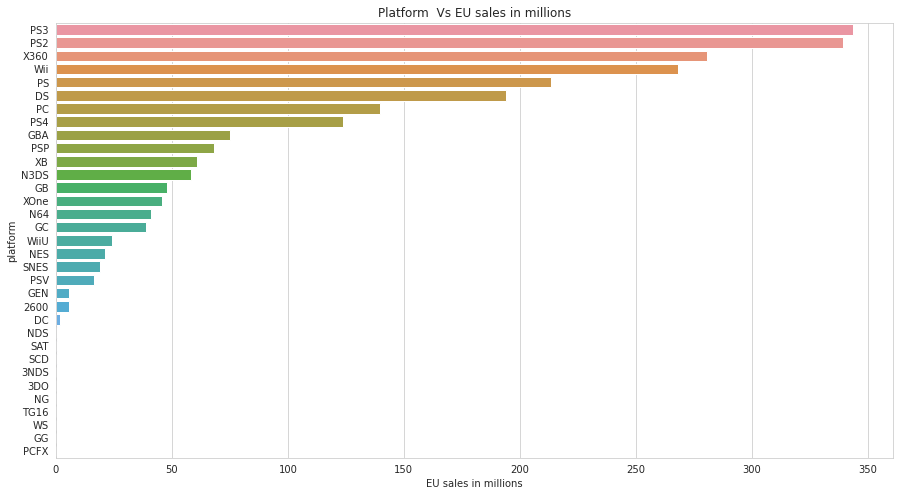

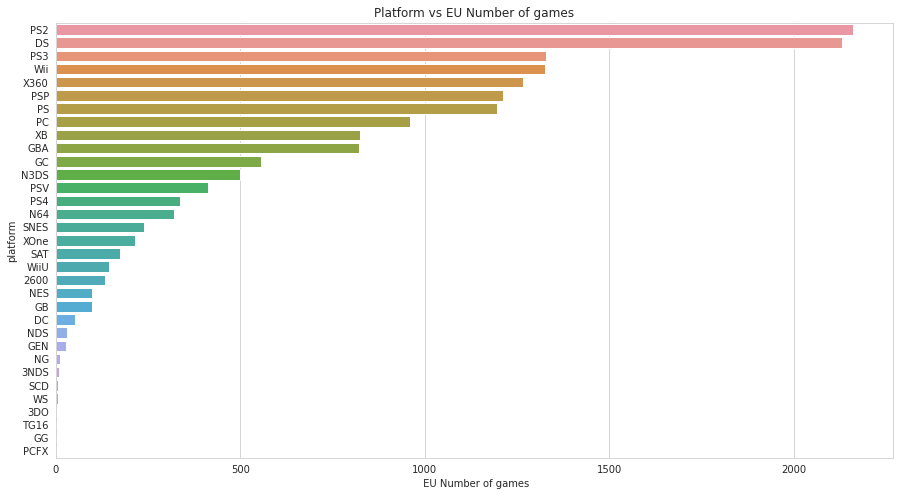

In [21]:
#EU plot Platform vs Sales
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
d =sns.barplot(y="platform", x="eu_sales_in_millions" ,data=eus_plat)
d.set_title("Platform  Vs EU sales in millions" )
d.set(xlabel= "EU sales in millions")

# For PLATFORM vs  number of games EU region
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
c =sns.barplot(y="platform", x="num_of_games" ,data=eus_plat.sort_values("num_of_games", ascending=False))
c.set_title("Platform vs EU Number of games")
c.set(xlabel= " EU Number of games")

In [22]:
#for JP 
#JP SALES DISTRIBUTION for Platfrom
jps_platform = vgsales.groupby('platform').agg({'jp_sales':'sum', 'name': 'count'}).sort_values("jp_sales", ascending=False)

#Rename in lowercases
jps_platform= jps_platform.rename(columns={'jp_sales': 'jp_sales_in_millions', 'name' : 'num_of_games'}) 

#Add Percentage statistic and Cummulative Percentage
jps_platform["percent_num_of_games"] = jps_platform["num_of_games"]/jps_platform['num_of_games'].sum()*100
jps_platform["cumm_num_of_games"] = jps_platform["percent_num_of_games"].cumsum()

jps_platform = jps_platform.reset_index().head(20) # Index reset and selectiong platforms over 2million sales
jps_platform

,platform,jp_sales_in_millions,num_of_games,percent_num_of_games,cumm_num_of_games
0,DS,175.02,2132,12.846469,12.846469
1,PS,139.82,1196,7.206556,20.053025
2,PS2,139.20,2161,13.021210,33.074235
3,SNES,116.55,239,1.440106,34.514341
4,NES,98.65,98,0.590504,35.104845
5,N3DS,97.30,500,3.012774,38.117619
6,GB,85.12,98,0.590504,38.708122
7,PS3,79.99,1329,8.007954,46.716076
8,PSP,76.79,1213,7.308990,54.025066
9,Wii,69.35,1325,7.983852,62.008918


[Text(0.5, 0, ' JP Number of games')]

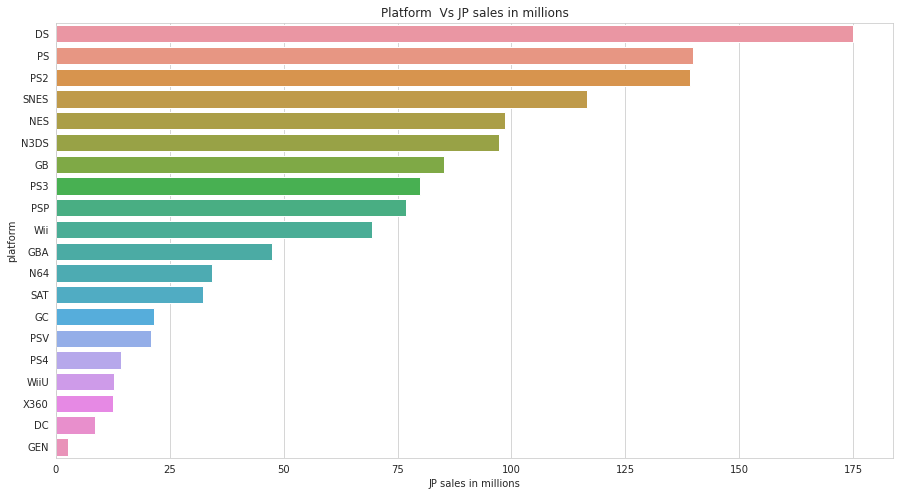

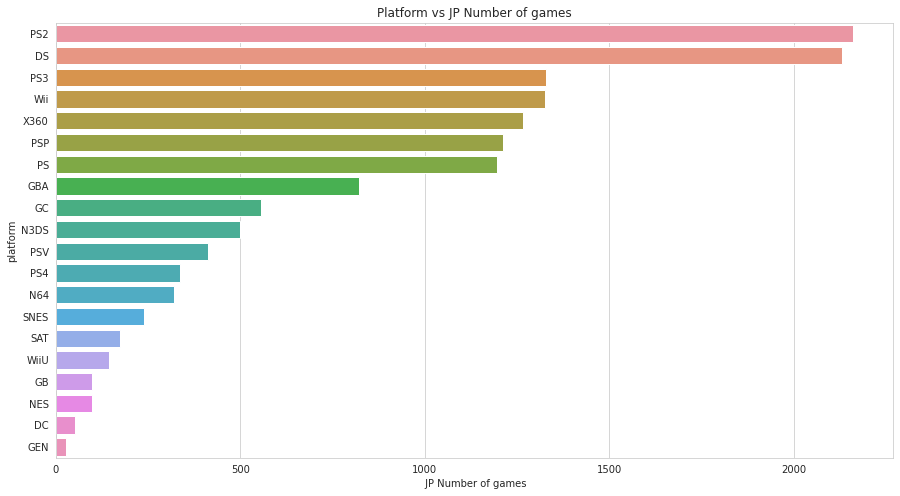

In [23]:
#JP plot Platform vs Sales
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
e =sns.barplot(y="platform", x="jp_sales_in_millions" ,data=jps_platform)
e.set_title("Platform  Vs JP sales in millions" )
e.set(xlabel= "JP sales in millions")

# For PLATFORM vs  number of games JP region
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
f =sns.barplot(y="platform", x="num_of_games" ,data=jps_platform.sort_values("num_of_games", ascending=False))
f.set_title("Platform vs JP Number of games")
f.set(xlabel= " JP Number of games")

In [24]:
#OTHER region
#OTHER SALES DISTRIBUTION for Platfrom
other_platform = vgsales.groupby('platform').agg({'other_sales':'sum', 'name': 'count'}).sort_values("other_sales", ascending=False)

#Rename in lowercases
other_platform= other_platform.rename(columns={'other_sales': 'other_sales_in_millions', 'name' : 'num_of_games'}) 

#Add Percentage statistic and Cummulative Percentage
other_platform["percent_num_of_games"] = other_platform["num_of_games"]/other_platform['num_of_games'].sum()*100
other_platform["cumm_num_of_games"] = other_platform["percent_num_of_games"].cumsum()

other_platform = other_platform.reset_index().head(20) # Index reset and selectiong platforms over 2million sales
other_platform

,platform,other_sales_in_millions,num_of_games,percent_num_of_games,cumm_num_of_games
0,PS2,193.44,2161,13.021210,13.021210
1,PS3,141.93,1329,8.007954,21.029164
2,X360,85.54,1265,7.622319,28.651482
3,Wii,80.61,1325,7.983852,36.635334
4,DS,60.27,2132,12.846469,49.481803
5,PS4,43.36,336,2.024584,51.506387
6,PSP,42.19,1213,7.308990,58.815377
7,PS,40.91,1196,7.206556,66.021933
8,PC,24.86,960,5.784526,71.806459
9,N3DS,12.55,500,3.012774,74.819234


[Text(0, 0.5, 'Other sales in millions')]

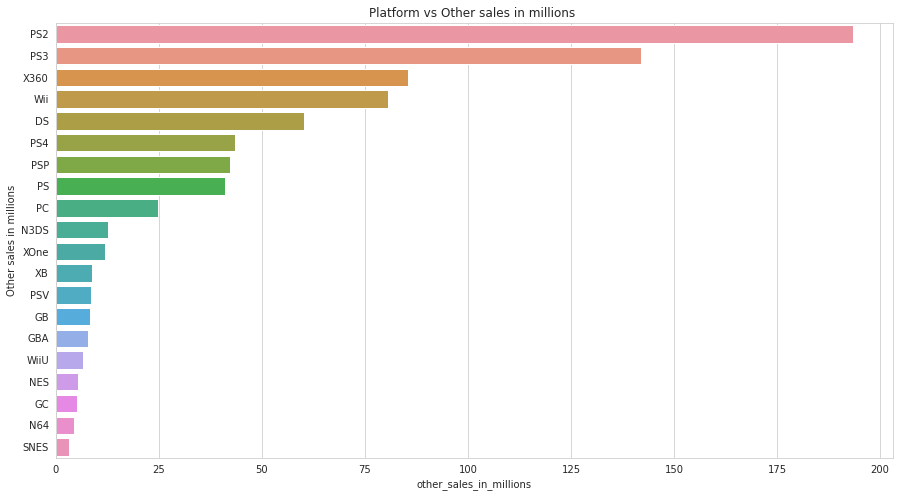

In [25]:
#Platform vs Other sales in millions 
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
g = sns.barplot(y="platform", x="other_sales_in_millions", data=other_platform)
g.set_title("Platform vs Other sales in millions ")
g.set(ylabel= "Other sales in millions")


[Text(0.5, 0, 'Other Number of games')]

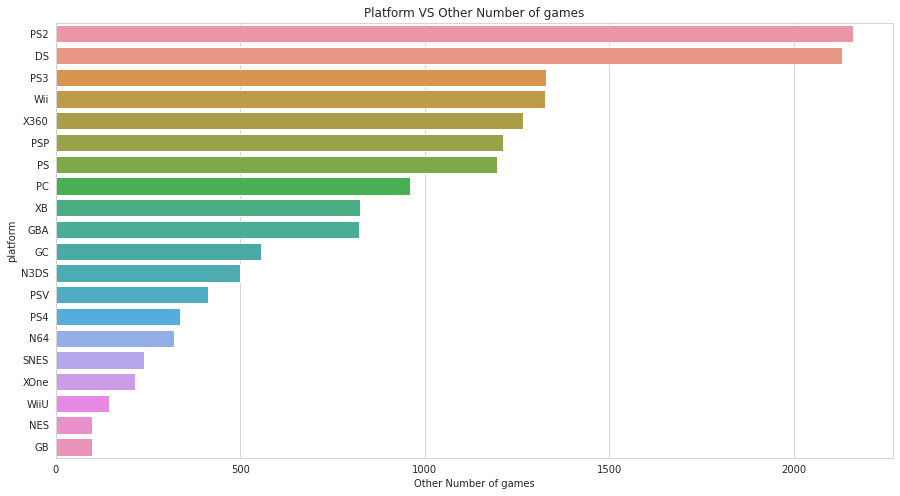

In [26]:
#Platform vs Other Number of games
plt.figure(figsize=(15,8))
h = sns.barplot(y="platform", x="num_of_games", data=other_platform.sort_values("num_of_games",ascending=False))
h.set_title("Platform VS Other Number of games")
h.set(xlabel="Other Number of games")

IN Europe region,PS3 has the most sales rather then Ps2, which has more number of units. Despite Nintendo DS having  much more units then other, it does not have many sales to be in top 5.

IN Japan Region, Nintendo DS is much more ahead then majority of Consoles, and suprising XBOX 360, despite being on top 5 in number of games, has very sold very poorly, which clearly shows it is Nintendo and playsation dominated market.

IN Other Regions, We can see Sony's ps2 and ps3 hold the first two places and xbox360 at 3rd, again Nintendo DS falls shorts regardless of having 2nd highest units made.

Which games are favoured regionwise?

<AxesSubplot:title={'center':'Other'}, xlabel='other_sales', ylabel='name'>

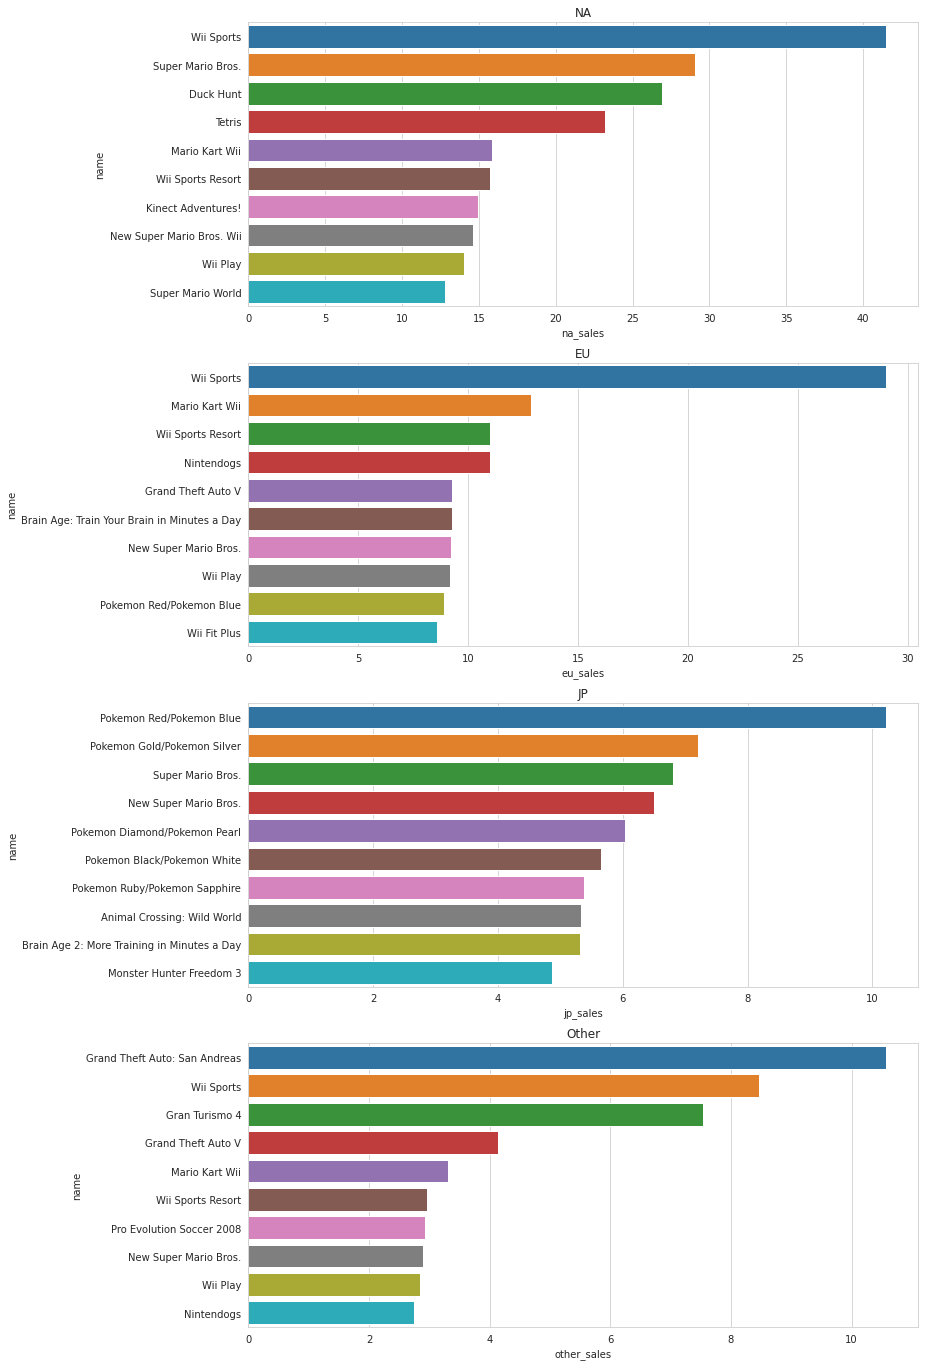

In [27]:
# Comparing top selling games in NA, EU & JP
fig, axes = plt.subplots(4,1, figsize=(12,24))

axes[0].set_title('NA')
sns.barplot(ax=axes[0],x=vgsales["na_sales"].sort_values(ascending=False)[:10], y=vgsales.sort_values('na_sales', ascending=False).name[:10])

axes[1].set_title('EU')
sns.barplot(ax=axes[1],x=vgsales["eu_sales"].sort_values(ascending=False)[:10], y=vgsales.sort_values('eu_sales', ascending=False).name[:10])

axes[2].set_title('JP')
sns.barplot(ax=axes[2],x=vgsales["jp_sales"].sort_values(ascending=False)[:10], y=vgsales.sort_values('jp_sales', ascending=False).name[:10])

axes[3].set_title('Other')
sns.barplot(ax=axes[3],x=vgsales["other_sales"].sort_values(ascending=False)[:10], y=vgsales.sort_values('other_sales', ascending=False).name[:10])

In North America, platforming games from Nintendo seem to be especially favoured. We can see Nintendo holds top 5 console games.

In Europe, party games tend to be favoured and interestingly, Grand Theft Auto V, the only action and non-Nintendo game.

Nintendo is dominant in all regions but especially in Japan. Pokemon itself is very popular taking half of the top ten spots. Other Nintendo games such as Animal Crossing: Wild World uniquely appear only in Japan's top 10. 9 out of 10 top games are made for Nintendo consoles.

In Other regions, Nintendo is not nearly as dominant, action games such as Grand Theft Auto become far more popular instead. Since its open world and much more flexible to play.

# **2.3 - GENRE**

**2.3.1** - What genres are in the dataset?

In [28]:
vgsales.genre.value_counts()

Action          3315
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       866
Fighting         848
Strategy         681
Puzzle           582
Name: genre, dtype: int64

The video games in this database are divided into 12 different genres. These general characterisations of each genre are expalined below:

* **Action** - Precision and reaction based challenges.
* **Adventure** - Exploration and a story driven narritive. Puzzles are often incorporated too.
* **Fighting** - Combat between usually two players where unique technical inputs are often required.
* **Platform** - Movement, such as jumping and climbing, is used to traverse an environment.
* **Puzzle** - Problem solving and various logical challenges. Often incorporated into other genres.
* **Racing** - Driving some form of transportation either against others or against time
* **Role-playing** - Progression based systems where a player character becomes increases in strength, often through a story.
* **Shooter** - Ranged weaponry, most commonly guns, in combat to damage opponents. Opponents can be other players or AI controlled opponents.
* **Simulation** - Systems which aim to simulate reality (real or fictional).
* **Sports** - Recreations of sports but in a video game.
* **Strategy** - Skillful and careful planning based gameplay to achieve an objective.
* **Misc** - Any game that does not fall into any of the above categories. Notably, music games and party games fall in this category.

In [29]:
#How many games of each genre are present in vgsales dataset?
vgsales_genre1 = vgsales.groupby('genre').agg({'total_sales':'sum', 'name': 'count'})
vgsales_genre= vgsales_genre1.rename(columns={'total_sales': 'total_sales_in_millions', 'name' : 'num_of_games'}).reset_index()

 #Add Percentage statistic and Cummulative Percentage
vgsales_genre["percent_num_of_games"] = vgsales_genre["num_of_games"]/vgsales_genre['num_of_games'].sum()*100
#SORT
vgsales_genre1 = vgsales_genre.sort_values("percent_num_of_games", ascending = False)

#Cummulative percentage
vgsales_genre1["cumm_perc_num_of_games"] = vgsales_genre1["percent_num_of_games"].cumsum()
#Resetting the Index from Genre 
vgsales_genre1.reset_index(drop = True)

,genre,total_sales_in_millions,num_of_games,percent_num_of_games,cumm_perc_num_of_games
0,Action,1751.14,3315,19.974693,19.974693
1,Sports,1330.93,2346,14.135936,34.110629
2,Misc,809.96,1739,10.478429,44.589058
3,Role-Playing,927.37,1488,8.966016,53.555074
4,Shooter,1037.37,1310,7.893468,61.448542
5,Adventure,239.04,1286,7.748855,69.197397
6,Racing,732.04,1249,7.525910,76.723307
7,Platform,831.37,886,5.338636,82.061943
8,Simulation,391.91,866,5.218125,87.280067
9,Fighting,448.91,848,5.109665,92.389732


[Text(0, 0.5, 'Number of games')]

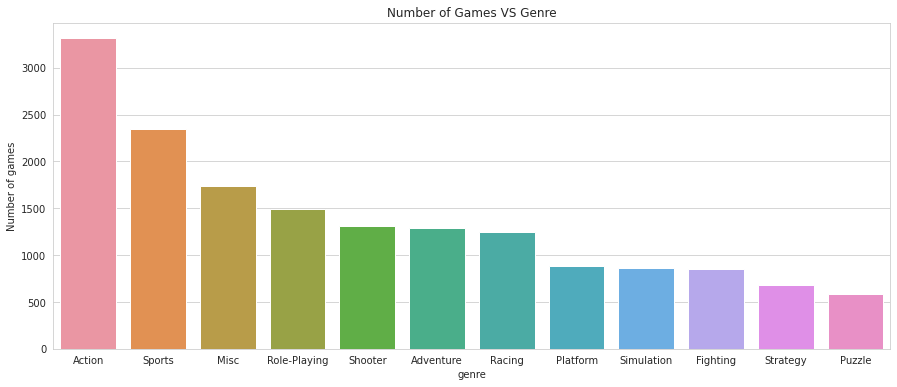

In [30]:
#for count of games sold by genre
plt.figure(figsize=(15,6))
l = sns.barplot(x="genre", y="num_of_games", data=vgsales_genre1)
l.set_title("Number of Games VS Genre")
l.set(ylabel= "Number of games")

As we can see the Action genre makes the most sales. 
As for sports, most of the games in sports category mostly are released yearly, such as FIFA 2012, FIFA 2013, WWE 2k15, WWE 2k16 etc.


**2.3.2** - But does the action genre tops the most selling games count?

<AxesSubplot:title={'center':'Number of Video Games occurring in top 100 best selling games'}, xlabel='count', ylabel='genre'>

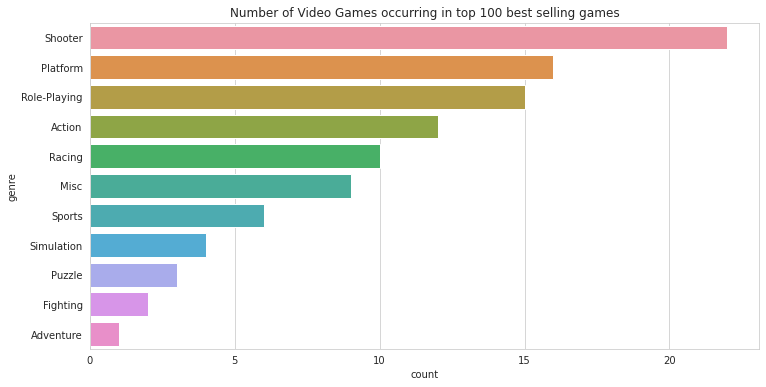

In [31]:
top_hundred_data = vgsales.sort_values('total_sales', ascending=False)[:100]

plt.figure(figsize=(12,6))
plt.title("Number of Video Games occurring in top 100 best selling games")
sns.countplot(y='genre', data=top_hundred_data, order=top_hundred_data.genre.value_counts().index)

When we filter for the top 100 most selling, suprisingly shooter games are the most recurring genre out of all, following it Platform and Role playing games are next. Action games gets the 4th spot.

**2.3.3** - Which Genre sells the most?

[Text(0, 0.5, 'Total sales in millions')]

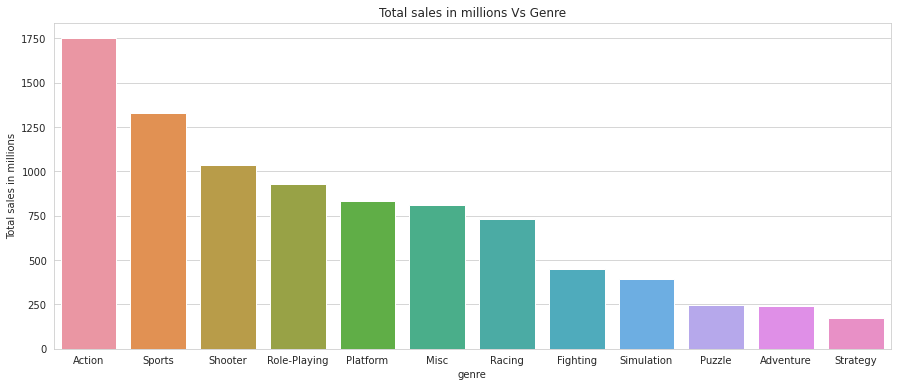

In [32]:
#Visualization for Genre which sells the most
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
k =sns.barplot(x="genre", y="total_sales_in_millions",data=vgsales_genre1.sort_values("total_sales_in_millions",ascending=False))
k.set_title("Total sales in millions Vs Genre")
k.set(ylabel= "Total sales in millions")

It isn't too suprising that more the number of games made for a genre, more units sold of that genre.

**2.3.4**   How about average sales of genres?

<AxesSubplot:title={'center':'Mean Global Sales of Video Games by Genre'}, xlabel='total_sales', ylabel='genre'>

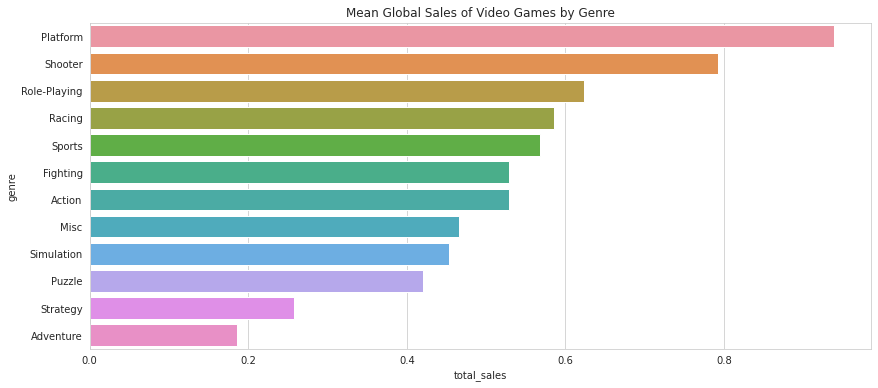

In [33]:
# Mean sales by genre
genresales_mean = vgsales.groupby('genre',as_index=False).mean()
plt.figure(figsize=(14,6))
plt.title("Mean Global Sales of Video Games by Genre")
sns.barplot(data = genresales_mean.sort_values("total_sales",ascending=False), x='total_sales', y='genre')

Suprisingly, Platform genre does the best on an average over all the other genre.

Despite having the most sales, action has comparatively low mean sales then other genres.


Because a lot of games are made into action genre, the market may have been **oversaturated**,which implies many games may sell very much or very little.

**2.3.5** Do certain genres sell more on certain platforms?

<AxesSubplot:xlabel='platform', ylabel='genre'>

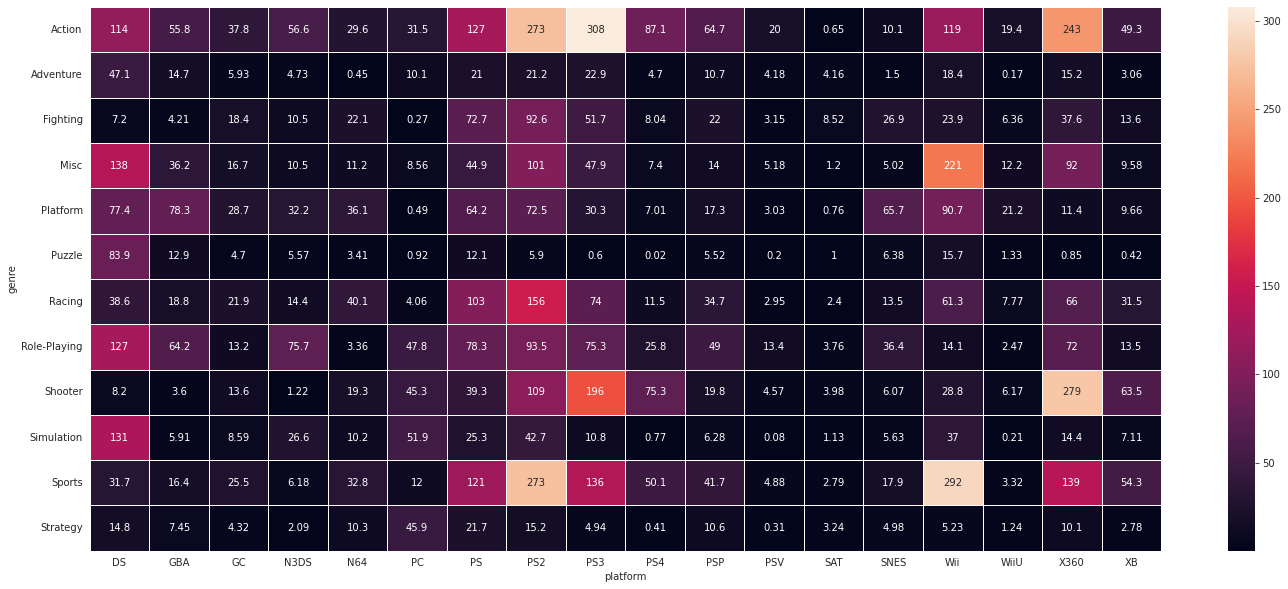

In [34]:
#using a heatmap we can make that calculation. for sum
plt.figure(figsize=(24,10))
m = pd.crosstab(vgsales["genre"],vgsales["platform"],values=vgsales["total_sales"],aggfunc=np.sum).dropna(axis=1)
sns.heatmap(m, annot=True,fmt=".3g", linewidths=1)

<AxesSubplot:xlabel='platform', ylabel='genre'>

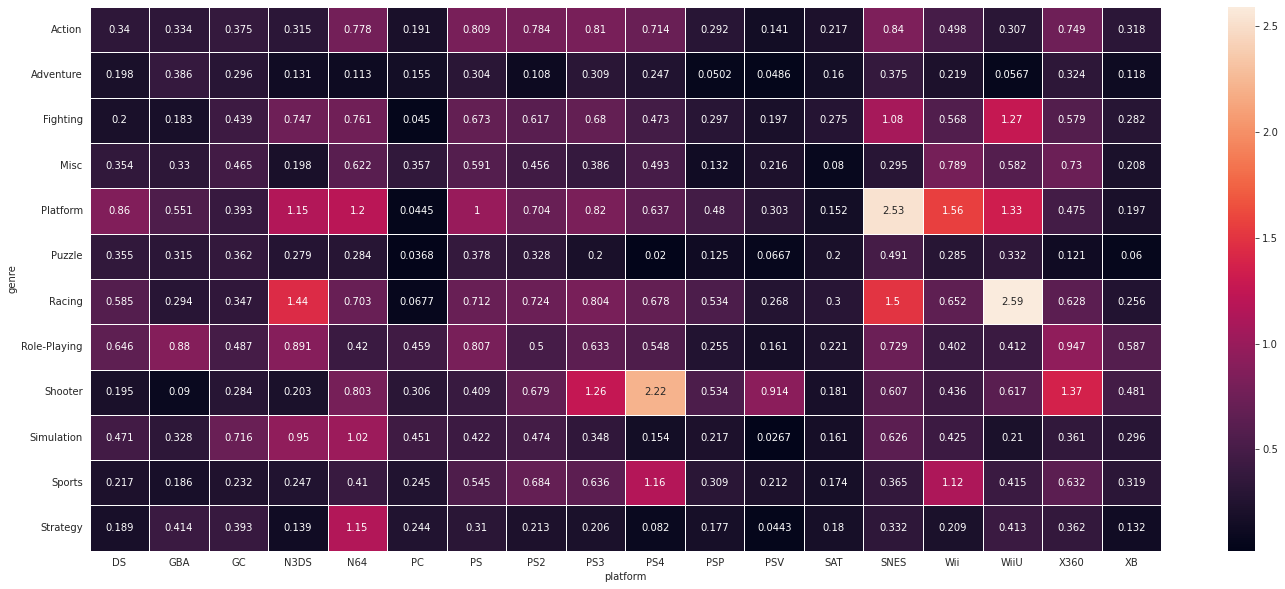

In [35]:
#using a heatmap we can make that calculation. for mean
plt.figure(figsize=(24,10))
m = pd.crosstab(vgsales["genre"],vgsales["platform"],values=vgsales["total_sales"],aggfunc=np.mean).dropna(axis=1)
sns.heatmap(m, annot=True,fmt=".3g", linewidths=1)

As we can see, action games sell better on SONY and Microsoft consoles. Adventure,Puzzle, Strategy games have average sales on all platforms.
Fighting games scores better on playstation consoles but the mean sales are better on NINTENDO consoles. It may be due to popularity of games such as Super Smash brothers.

Racing games are better sold on Both Playstation and Nintendo consoles such as SNES WiiU.

Shooter category sell better on home consoles such as playstation and XBOX 360, since franchises such as Call of duty, Battlefield which mostlty deal with first person shooter are usually made for these console audience.

Platform and Misc games tend to sell better on Nintendo consoles as they target most of the casual gaming population especially to families. Due to popularity of games such as Mario series which always had a big fanbase.

# **2.4**   **Publisher**

How many publishers are present in the dataset?

In [36]:
vgsales["publisher"].value_counts()

Electronic Arts                 1356
Activision                       978
Bandai Namco Games               939
Ubisoft                          928
Konami Digital Entertainment     835
                                ... 
Pacific Century Cyber Works        1
TechnoSoft                         1
Phantagram                         1
Ertain                             1
Gearbox Publishing                 1
Name: publisher, Length: 593, dtype: int64

**2.4.1** Which publishers release the most games?

In [37]:
vgsales_pub1 = vgsales.groupby('publisher').agg({'total_sales':'sum', 'name': 'count'})
vgsales_pub = vgsales_pub1.rename(columns={'total_sales': 'total_sales_in_millions', 'name' : 'num_of_games'}).sort_values("total_sales_in_millions",ascending=False)

 #Add Percentage statistic and Cummulative Percentage
vgsales_pub["percent_num_of_games"] = vgsales_pub["num_of_games"]/vgsales_pub['num_of_games'].sum()*100

#Cummulative Percentage
vgsales_pub["cumm_perc_num_of_games"] = vgsales_pub["percent_num_of_games"].cumsum()

#Selecting only first 17 Publishers whose sales are almost 100 millions or above
vgsales_pubfinal= vgsales_pub.head(17).reset_index()
vgsales_pubfinal

,publisher,total_sales_in_millions,num_of_games,percent_num_of_games,cumm_perc_num_of_games
0,Nintendo,1789.45,712,4.290190,4.290190
1,Electronic Arts,1114.07,1356,8.170644,12.460834
2,Activision,728.14,978,5.892986,18.353820
3,Sony Computer Entertainment,638.10,715,4.308267,22.662087
4,Ubisoft,475.13,928,5.591709,28.253796
5,Take-Two Interactive,400.64,416,2.506628,30.760424
6,THQ,344.25,718,4.326344,35.086768
7,Konami Digital Entertainment,284.17,835,5.031333,40.118101
8,Sega,273.54,643,3.874428,43.992528
9,Bandai Namco Games,255.85,939,5.657990,49.650518


[Text(0.5, 0, 'Number of games')]

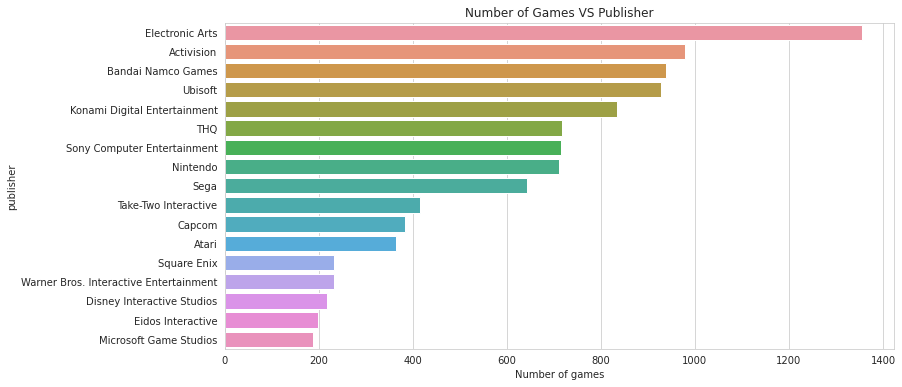

In [38]:
#for count of games sold by Publisher
plt.figure(figsize=(12,6))
q = sns.barplot(y="publisher", x="num_of_games",data=vgsales_pubfinal.sort_values("num_of_games",ascending=False))
q.set_title("Number of Games VS Publisher")
q.set(xlabel= "Number of games")

**2.4.2** Which publishers makes the most sales?

[Text(0.5, 0, 'Total sales in millions')]

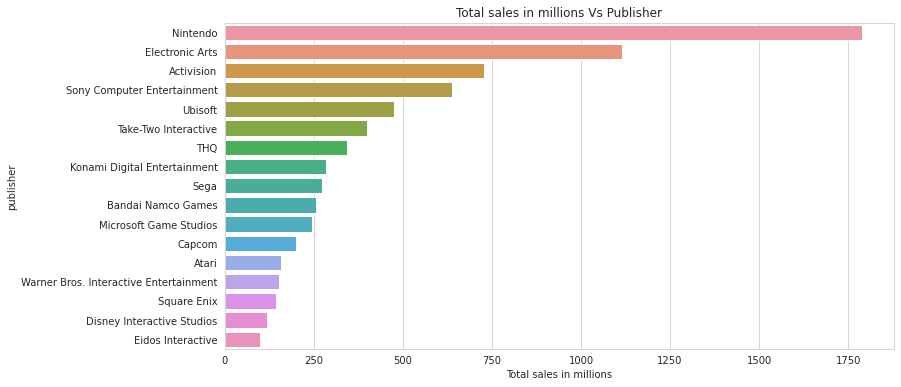

In [39]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
p =sns.barplot(y="publisher", x="total_sales_in_millions", data=vgsales_pubfinal)
p.set_title("Total sales in millions Vs Publisher")
p.set(xlabel = "Total sales in millions")

We can see despite Electronic Arts publishing the most games, still Nintendo makes the most of the sales despite ranking on 8th on number of games, since nintendo has many games that are pretty flushed out for every age group and different genres.

Electronic Arts mostly makes Sports games that are released on year basis.
Activision usually makes action and mostly Shooter games specially Call of duty series.
Sony has its own console and has mixed category of games.
Ubisoft has different games spread out on different genres and platforms and release windows usually aren't that long.
Take two interactive owns Rockstar games which are the developers of Critically acclaimed Grand theft auto series.

**2.4.3** Which publishers consistently deliveres top selling games?

<AxesSubplot:title={'center':'Top 20 Mean Total Sales by Publisher'}, xlabel='total_sales', ylabel='publisher'>

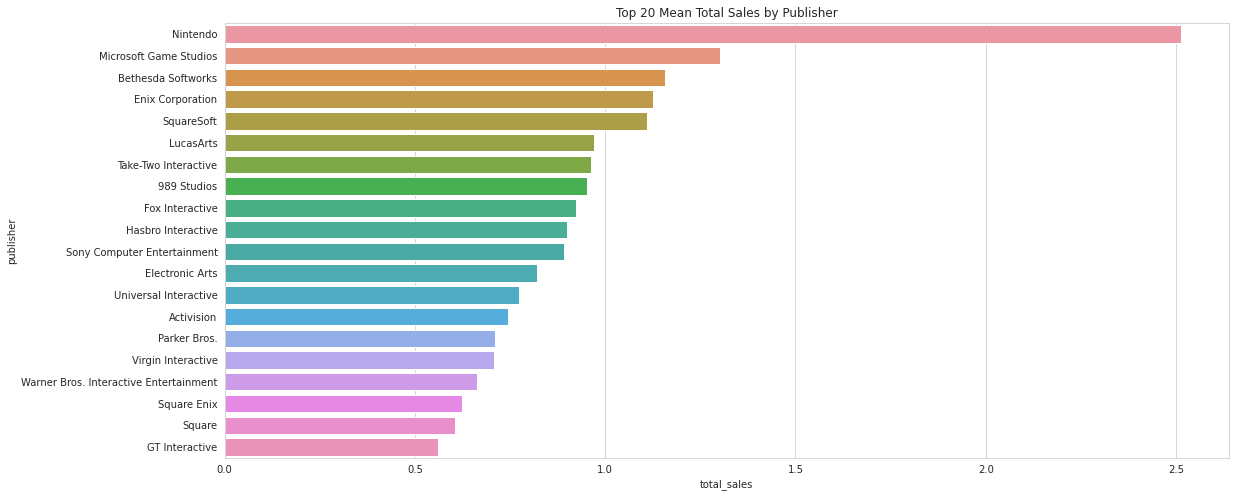

In [40]:
pubsal_counts = vgsales["publisher"].value_counts()
frequent_developers = vgsales.loc[vgsales["publisher"].isin(pubsal_counts.index[pubsal_counts.gt(5)])]

plt.figure(figsize=(18,8))
plt.title("Top 20 Mean Total Sales by Publisher")
sns.barplot(data=frequent_developers.groupby("publisher", as_index=False).mean().sort_values('total_sales', ascending=False)[:20] , x='total_sales', y='publisher')

"Quantity over Quality!". Other then Nintendo, publishers with most games doesn't neccessary make them top sellers. 

**Nintendo** has wide catalogue of games for almost every category.

**Microsoft** studios are behind Halo series. 

**Bethesda Softworks** made top games such as Fallout series, Elder scrolls notably Elden Scrolls 5 Skyrim.

**Square Enix** previous called Enix coop and **Square Soft** sold games such as Nier Series, Final Fantasy series which are globally loved.


**2.4.4** Does certain regions prefer certain publishers?



In [41]:
#making a table that shows publisher sales for all regions
vgregion_pub = vgsales.groupby("publisher")[["publisher","na_sales","eu_sales","jp_sales","other_sales"]].sum()
vgregion_pub = vgregion_pub.sort_values("eu_sales",ascending=False).reset_index()
vgregion_pub.head(25)

,publisher,na_sales,eu_sales,jp_sales,other_sales
0,Nintendo,817.63,418.98,457.28,95.38
1,Electronic Arts,597.99,371.90,14.04,129.99
2,Activision,430.20,215.64,6.55,75.39
3,Sony Computer Entertainment,278.26,198.43,76.86,84.51
4,Ubisoft,253.60,163.51,7.50,50.28
5,Take-Two Interactive,221.10,118.50,5.83,55.37
6,THQ,210.69,95.86,5.01,32.56
7,Sega,109.42,82.49,57.07,24.52
8,Konami Digital Entertainment,92.57,69.76,91.30,30.36
9,Microsoft Game Studios,155.35,68.61,3.26,18.56


[Text(0.5, 0, ' NA sales in millions')]

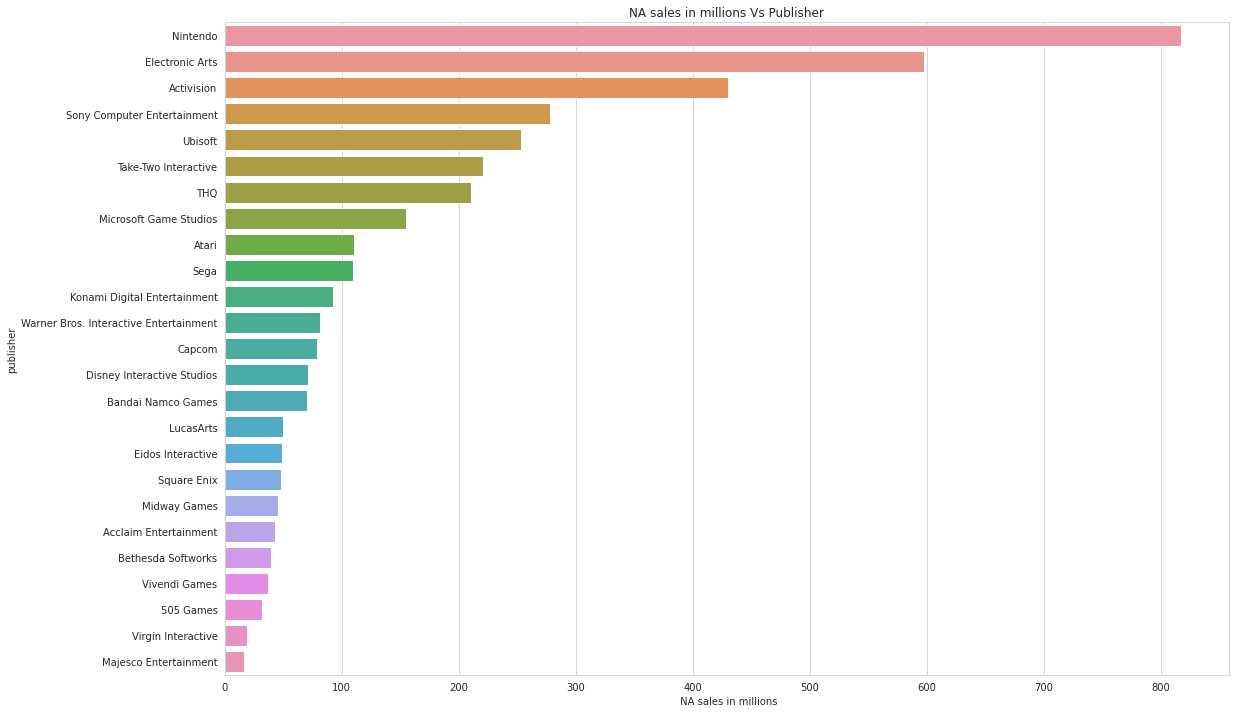

In [42]:
#FOR North-America
#NA sales in millions Vs Publisher for top 25 pubiishers
plt.figure(figsize=(18,12))
sns.set_style("whitegrid")
j =sns.barplot(y="publisher", x="na_sales", data=vgregion_pub.sort_values("na_sales",ascending=False).head(25))
j.set_title("NA sales in millions Vs Publisher")
j.set(xlabel= " NA sales in millions")



[Text(0.5, 0, 'EU sales in millions')]

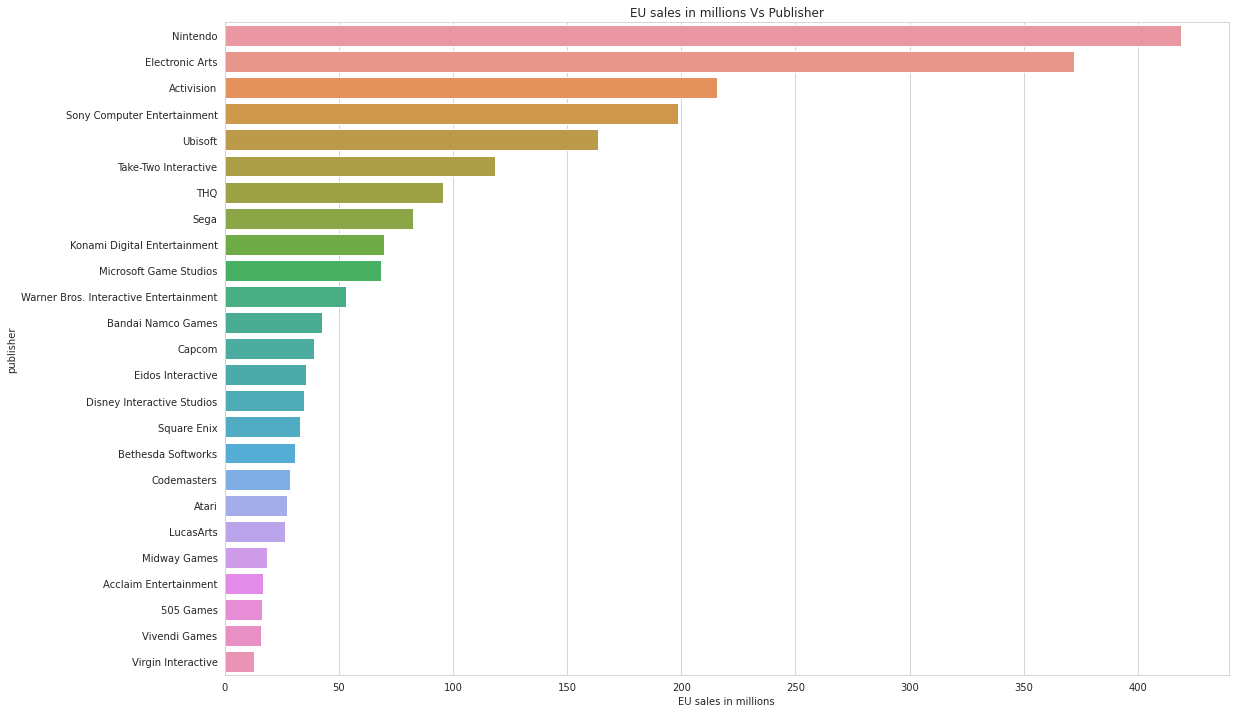

In [43]:
#FOR EU
#EU sales in millions Vs Publisher for top 25 pubiishers
plt.figure(figsize=(18,12))
k = sns.barplot(y="publisher", x="eu_sales", data=vgregion_pub.sort_values("eu_sales",ascending=False).head(25))
k.set_title("EU sales in millions Vs Publisher")
k.set(xlabel= "EU sales in millions")


[Text(0.5, 0, 'JP sales in millions')]

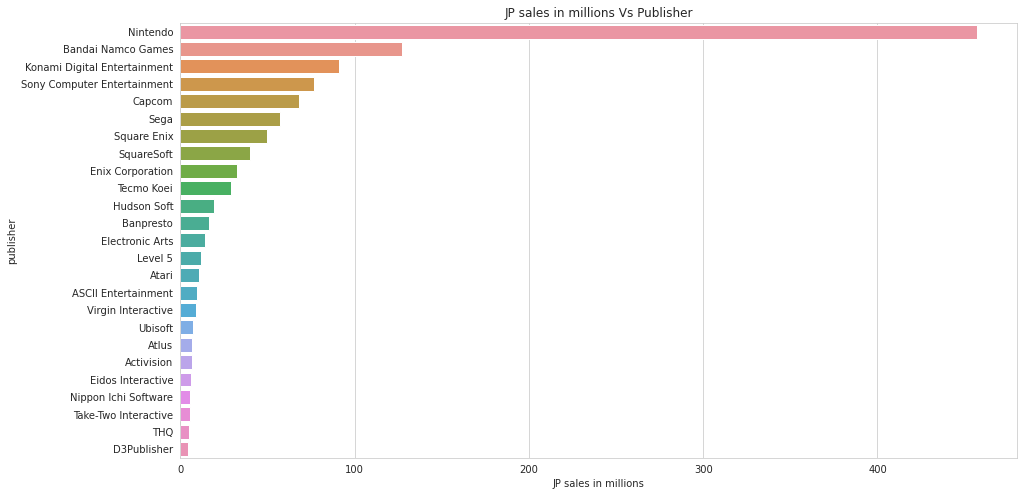

In [44]:
#FOR Japan
#JP sales in millions Vs Publisher for top 25 pubiishers
plt.figure(figsize=(15,8))
k = sns.barplot(y="publisher", x="jp_sales", data=vgregion_pub.sort_values("jp_sales",ascending=False).head(25))
k.set_title("JP sales in millions Vs Publisher")
k.set(xlabel= "JP sales in millions")

[Text(0.5, 0, 'Other region sales in millions')]

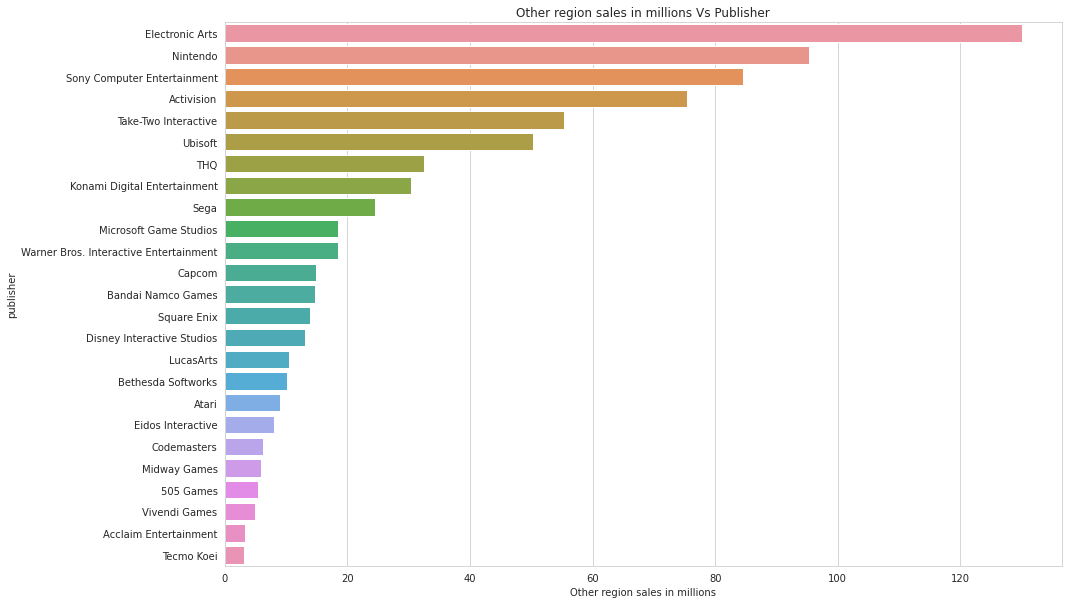

In [45]:
#FOR Other regions
#Other region sales in millions Vs Publisher for top 25 pubiishers
plt.figure(figsize=(15,10))
k = sns.barplot(y="publisher", x="other_sales", data=vgregion_pub.sort_values("other_sales",ascending=False).head(25))
k.set_title("Other region sales in millions Vs Publisher")
k.set(xlabel= "Other region sales in millions")

Aha!. As we can see **Nintendo** dominates the market just missing first rank in "Other regions", and especially in JAPAN region sales. 

Suprising Electronic Arts does not come in top 5 of Japaneese sales region. 
The top 5 publishers in Japan sales are based in Japan, so one can say the japaneese audience prefer homegrown companies.

Other then Japan region, you can see similar patterns on all the remaining regions of top 5 sales.


# 2.5 - Years


In [46]:
vgsales["year"].describe()

count    16596.000000
mean      2006.384068
std          5.867575
min       1977.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2017.000000
Name: year, dtype: float64

Over the years video games increasing become more popular, from ATARI 2000 to next gen consoles, the industry has seen its fair share of ups and downs. Lets see how years effects the sales

In [47]:
vgsales_year1 = vgsales.groupby('year').agg({'total_sales':'sum', 'name': 'count'})
vgsales_year= vgsales_year1.rename(columns={'total_sales': 'total_sales_in_millions', 'name' : 'num_of_games'}).reset_index()

 #Add Percentage statistic and Cummulative Percentage
vgsales_year["percent_num_of_games"] = vgsales_year["num_of_games"]/vgsales_year['num_of_games'].sum()*100
vgsales_year["cumm_perc_num_of_games"] =vgsales_year["percent_num_of_games"].cumsum()

#Resetting the Index from YEAR and making Year values from Float to Integer
vgsales_year.reset_index()
vgsales_year['year'] = vgsales_year['year'].astype(int)
vgsales_year

,year,total_sales_in_millions,num_of_games,percent_num_of_games,cumm_perc_num_of_games
0,1977,1.25,2,0.012051,0.012051
1,1978,4.89,8,0.048204,0.060255
2,1979,0.31,1,0.006026,0.066281
3,1980,13.51,12,0.072307,0.138588
4,1981,35.77,46,0.277175,0.415763
5,1982,30.58,38,0.228971,0.644734
6,1983,16.79,17,0.102434,0.747168
7,1984,50.39,15,0.090383,0.837551
8,1985,53.94,14,0.084358,0.921909
9,1986,37.07,21,0.126537,1.048445


**Q-** What was the **Best Year** for Video Games?

[Text(0, 0.5, ' Total sales in millions')]

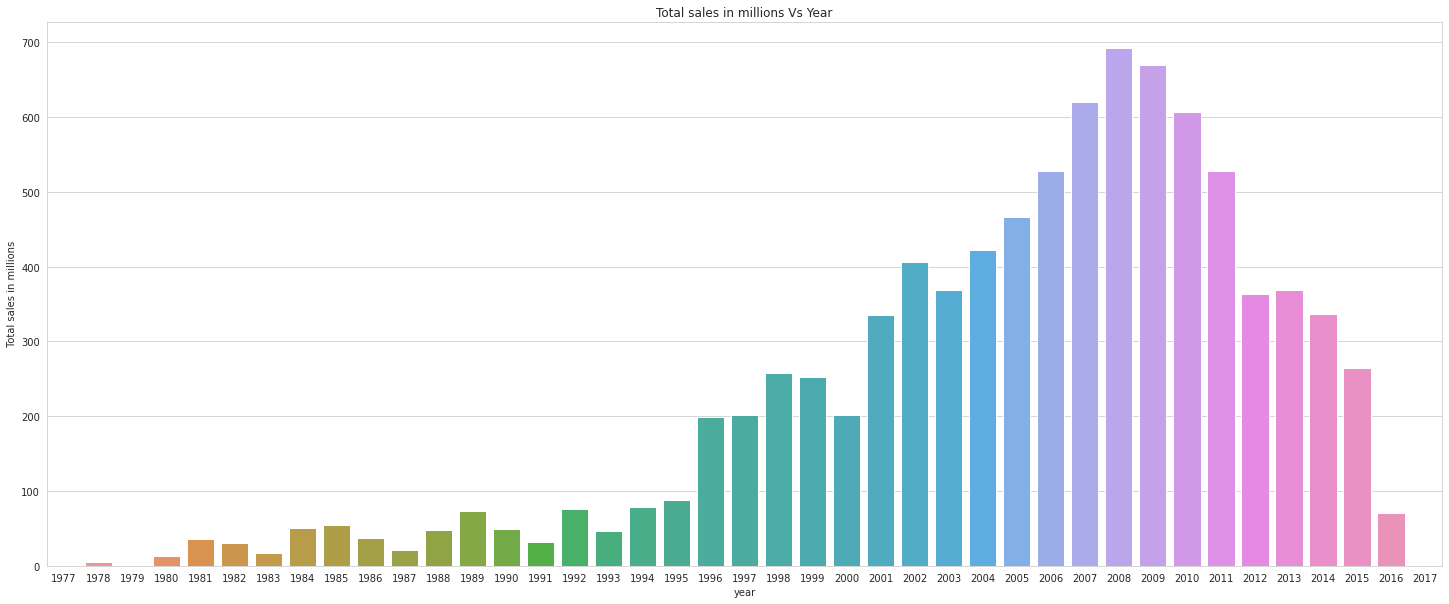

In [48]:
#NA sales in millions Vs YEAR
plt.figure(figsize=(25,10))
sns.set_style("whitegrid")
v =sns.barplot(x="year", y="total_sales_in_millions",data=vgsales_year)
v.set_title("Total sales in millions Vs Year")
v.set(ylabel= " Total sales in millions")

As the latest from data is 2017, it can still show the upward trajectory of video game popularity over the years. There are still some decline as we can see in year 1983 and 1987 but it was mostly positive progression. 

It is clear that at 2008 Video games industry was at its peak in sales, and after that it has not been able to achieve the same heights. In 2008, **multiplayer co-op games** was becoming popular. A lot of sequels for already established popularr games such as **Call of duty, Halo, Fallout, Grand theft Auto** etc was coming out that year. Almost every genre was getting a great game release on consistent basis that year.

# 3. Summary And Conclusions

After doing a through analysis we can conclude the following - 
* **Sales bracket** - Most of the Sales fall under category of 0-5 Million category.
* **Platform** - PS2 and Xbox made the most sales Globally, the pattern remains the same expect Japan where most Sales are made by Nintendo DS.
* **Games** - Wii Sports is the best selling game of all time with $82.53 million global sales.
Nintendo Games sells the most in all the region expect "Other region" where they prefer open world experiences such as Grand theft auto series.
* **Genre** - Action games makes the most sales, but Shooter genre are consistently in top selling games. Platform games on average make better sales then every other genre.
* **Publisher** - Nintendo dominates the market with well spread out games in every genres. Especially in Japan. Electronic arts, Activition and Sony are just behind it in ranking.
*  **Year** - Year 2008 is the best games for video games

Hope you enjoyed my analysis on video games sales. Thank you for reading!